# Predicción de Consumo de Energía Eléctrica  

## Descripción de los datos  
Este análisis utiliza el dataset *Individual household electric power consumption Dataset*, que contiene registros de consumo eléctrico minuto a minuto de un hogar entre 2006 y 2010. El objetivo es modelar y predecir potencia activa global  como variable principal de interés.  

## Motivación y enfoque  
La predicción del consumo eléctrico es fundamental para la gestión eficiente de la energía, la planificación de la demanda y el desarrollo de sistemas inteligentes en el sector energético.  

En este proyecto se implementa una **red  neuronal multicapa (MLP)** para pronosticar el consumo diario a partir de la serie temporal, evaluando la capacidad del modelo para capturar patrones y tendencias en los datos históricos.  

## Objetivos del análisis  
- Explorar y visualizar el comportamiento del consumo eléctrico en diferentes escalas de tiempo (diaria, mensual, anual).  
- Preparar los datos mediante limpieza, agregación temporal y escalamiento.  
- Dividir el conjunto en entrenamiento y validación para evaluar el rendimiento del modelo.  
- Implementar un modelo predictivo basado en redes neuronales densas (MLP).  
- Comparar valores reales y predichos para evaluar la capacidad del modelo de generalizar.  

## Metodología  

### Exploración y preparación de datos  
- Carga del dataset y transformación de variables a tipo numérico.  
- Eliminación de valores nulos y resampleo diario.  
- Análisis exploratorio con gráficos de series temporales, promedios mensuales y distribución por meses.  
- Generación de variables adicionalet
### Modelado y evaluación  
- División de los datos en entrenamiento
- Implementación de una red neuronal MLP con dos capas ocultas (64 y 32 neuronas, ReLU).  
- Entrenamiento durante 50 épocas con optimizador Adam y función de pérdida MSE.  
- Evaluación del rendimiento mediante las curvas de entrenamiento/validación.  
- Visualización de predicciones invertidas a la escala original y comparación contra valores reales.  es de 2010) y validación (2010 e


### Cargar librerías

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


### Cargar Dataset


In [7]:
df = pd.read_csv('household_power_consumption.txt',sep=';',na_values='?')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### Limpieza y preprocesamiento de datos

In [8]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],format='%d/%m/%Y %H:%M:%S')
df = df.drop(columns=['Date', 'Time'])

In [9]:
# Convertir columnas numéricas a float y eliminar filas con valores nulos
df = df.astype({'Global_active_power': 'float', 'Global_reactive_power': 'float', 'Voltage': 'float',
                'Global_intensity': 'float', 'Sub_metering_1': 'float', 'Sub_metering_2': 'float', 'Sub_metering_3': 'float'})
df = df.dropna()

In [10]:
print(df.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64


In [11]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


### Visualizaciones

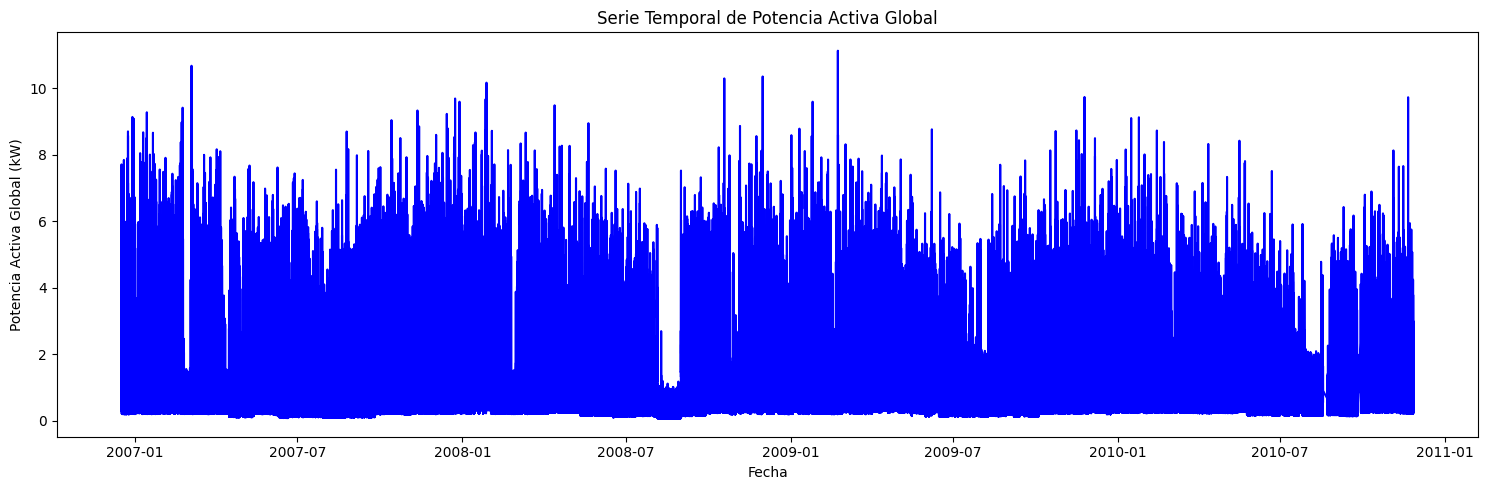

In [12]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Datetime', y='Global_active_power', color='blue')
plt.title('Serie Temporal de Potencia Activa Global')
plt.xlabel('Fecha')
plt.ylabel('Potencia Activa Global (kW)')
plt.tight_layout()
plt.show()

In [13]:
df_daily = df.resample('D', on='Datetime').mean()
df_daily = df_daily.reset_index()
df_daily = df_daily.dropna()

In [14]:
df_daily['year'] = df_daily['Datetime'].dt.year

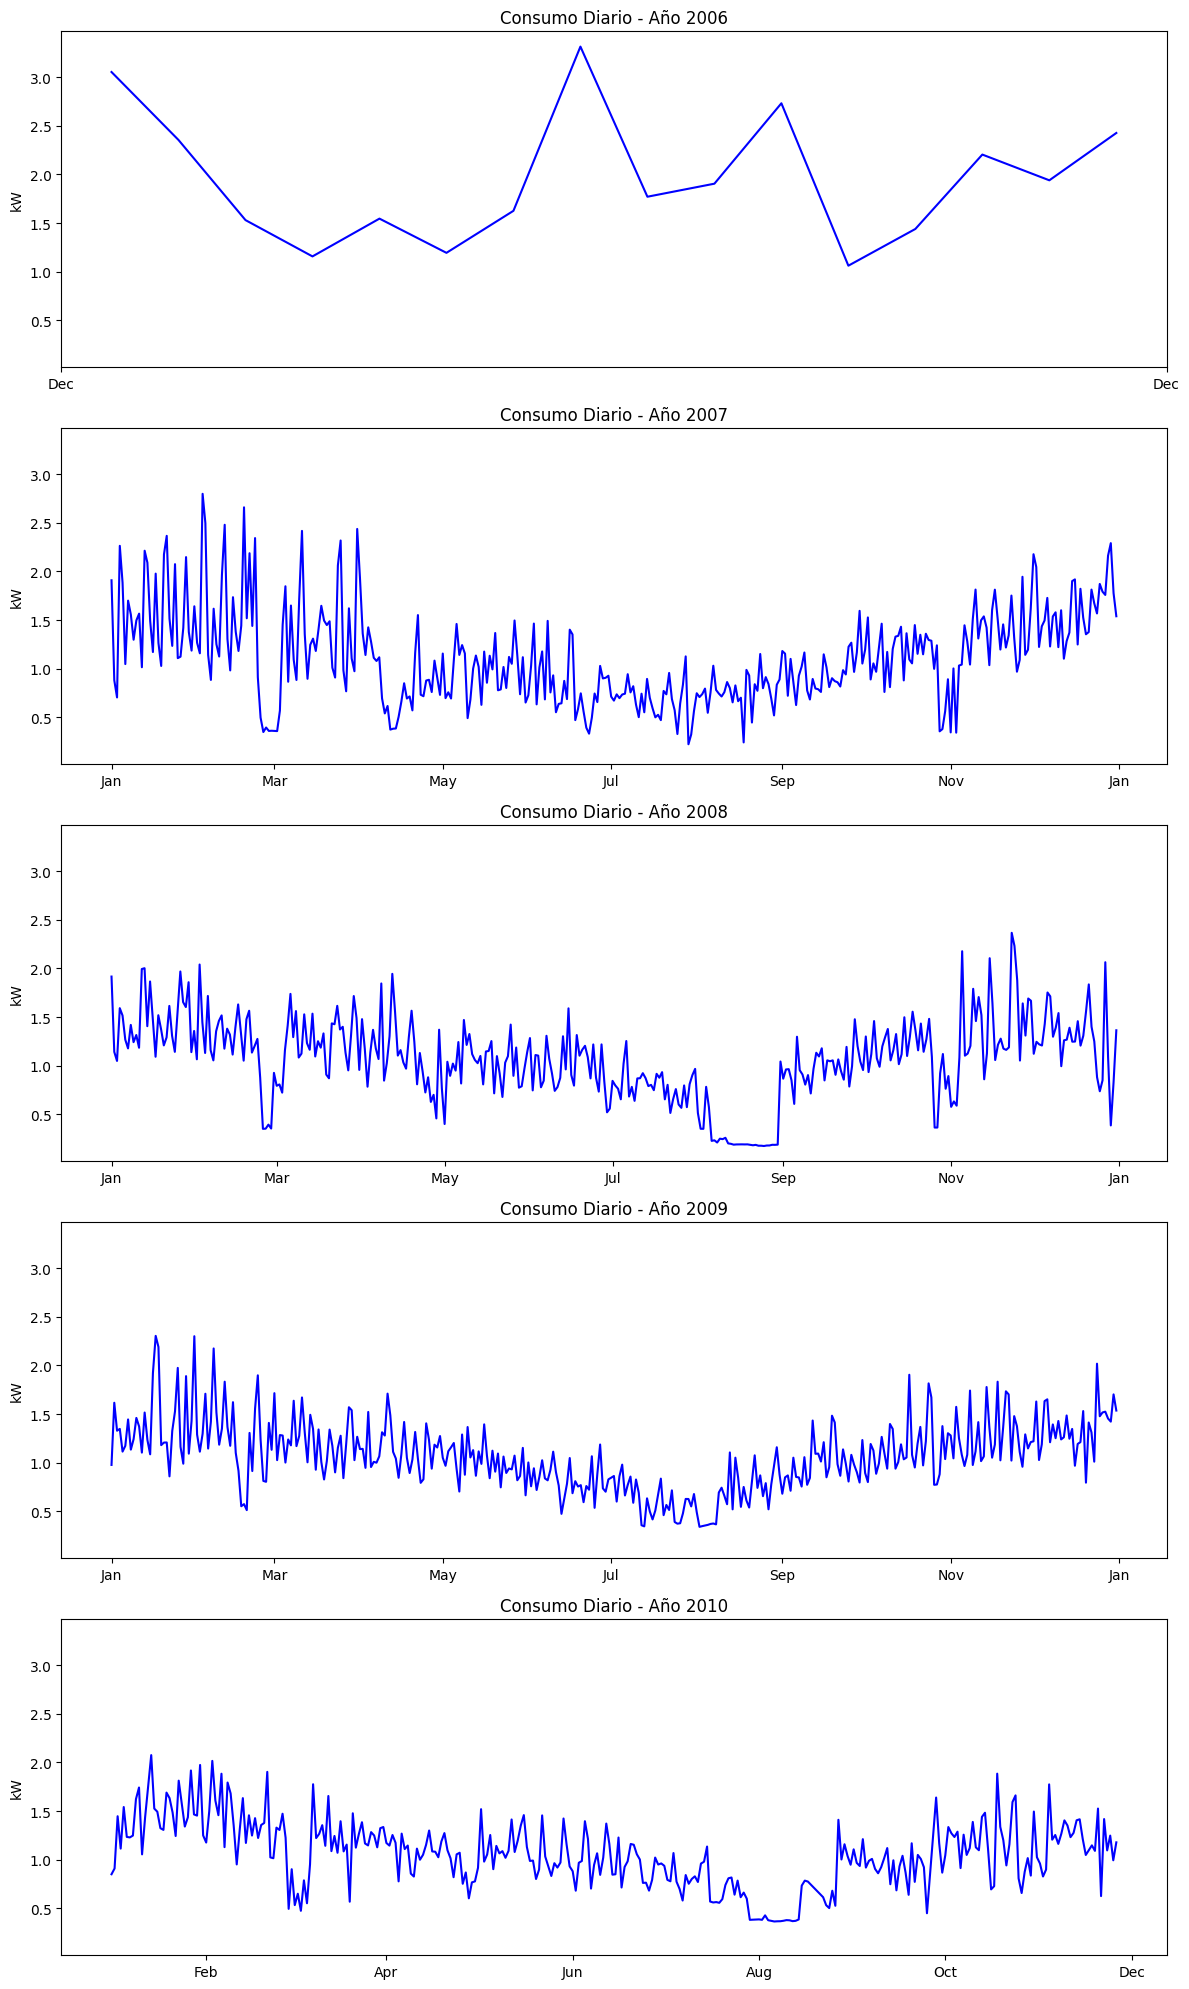

In [15]:
#Visualizaciones por año
import matplotlib.dates as mdates

years = sorted(df_daily['year'].unique())
n_years = len(years)

fig, axes = plt.subplots(n_years, 1, figsize=(12, 4 * n_years), sharey=True)

for i, year in enumerate(years):
    ax = axes[i]
    data = df_daily[df_daily['year'] == year]
    sns.lineplot(data=data, x='Datetime', y='Global_active_power', ax=ax, color='blue')
    ax.set_title(f'Consumo Diario - Año {year}')
    ax.set_xlabel('')
    ax.set_ylabel('kW')
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

In [16]:
df_daily = df_daily[df_daily['year'] != 2006] #Eliminamos 2006 al tener pocos registros

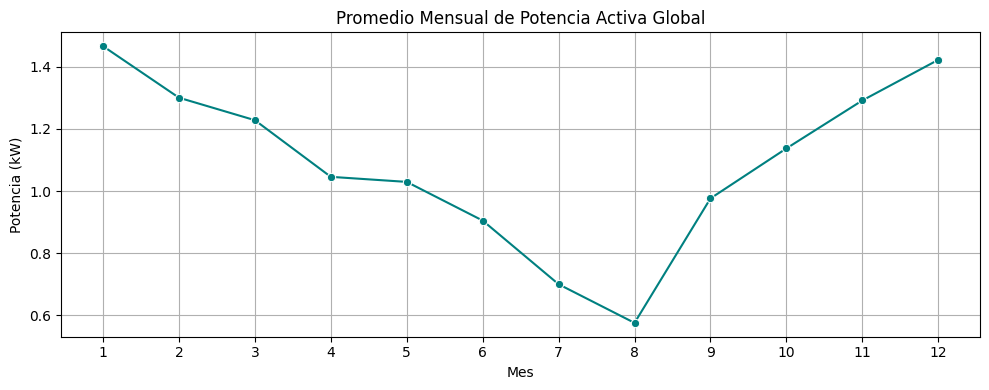

In [17]:
df_daily['weekday'] = df_daily['Datetime'].dt.dayofweek
df_daily['month'] = df_daily['Datetime'].dt.month

monthly_avg = df_daily.groupby('month')['Global_active_power'].mean()

plt.figure(figsize=(10, 4))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='teal')
plt.title('Promedio Mensual de Potencia Activa Global')
plt.xlabel('Mes')
plt.ylabel('Potencia (kW)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

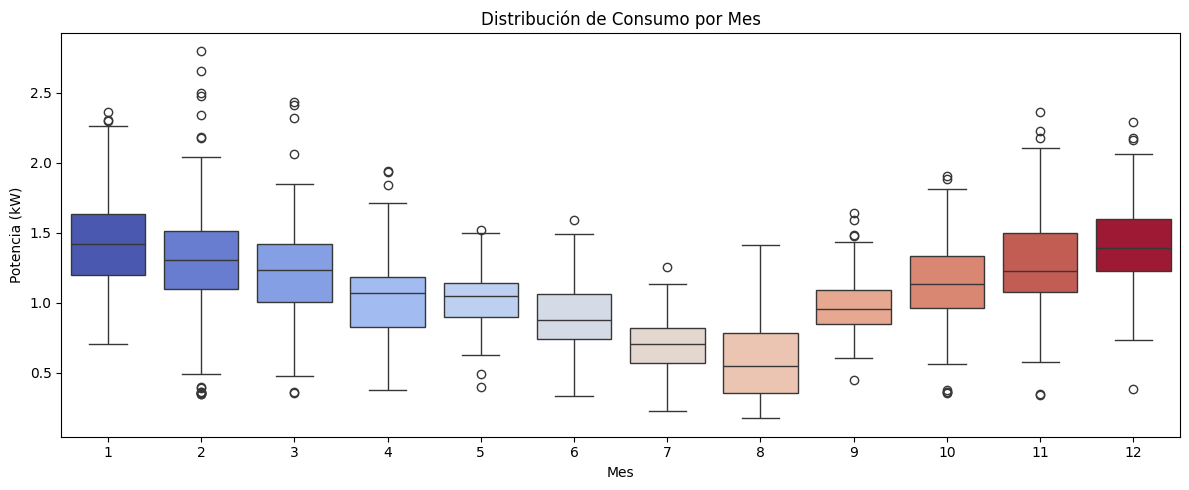

In [18]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='month',y='Global_active_power',data=df_daily,hue='month',palette='coolwarm',legend=False)
plt.title('Distribución de Consumo por Mes')
plt.xlabel('Mes')
plt.ylabel('Potencia (kW)')
plt.tight_layout()
plt.show()

Del análisis de la serie temporal se aprecia que la potencia activa global promedio tiende a disminuir en los meses de abril y agosto. Esta variación estacional podría estar asociada a cambios en los patrones de consumo de los hogares o a factores externos como condiciones climáticas, estacionales o hábitos de uso de energía.

### Creación de modelo

In [19]:
# Dividir datos temporalmente
split_date = pd.to_datetime("2010-01-01")
df_train = df_daily[df_daily['Datetime'] < split_date].copy()
df_val = df_daily[df_daily['Datetime'] >= split_date].copy()

print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (1094, 11)
Shape of test: (323, 11)


In [20]:
# Escalar solo la columna de interés (sin modificar df directamente)
# Inicializar scaler
scaler = MinMaxScaler(feature_range=(0, 1))

train_values = df_train['Global_active_power'].values.reshape(-1, 1)
train_scaled = scaler.fit_transform(train_values)

val_values = df_val['Global_active_power'].values.reshape(-1, 1)
val_scaled = scaler.transform(val_values)

In [21]:
import numpy as np

def makeXy(ts, nb_timesteps):
    """
    Convierte una serie temporal en datos de entrenamiento.

    Parámetros:
    - ts: Serie temporal escalada (array 1D)
    - nb_timesteps: Tamaño de la ventana deslizante (ej. 7 días)

    Retorna:
    - X: Matriz de inputs (n_samples, nb_timesteps)
    - y: Vector de outputs (n_samples,)
    """
    X, y = [], []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(ts[i-nb_timesteps:i])  # Últimos nb_timesteps valores como input
        y.append(ts[i])  # Valor siguiente como target
    return np.array(X), np.array(y)

# definir el tamaño de la ventana (por ejemplo, 7 días)
window_size = 7

# generar X, y para entrenamiento y validación
X_train, y_train = makeXy(train_scaled.flatten(), window_size)
X_val, y_val = makeXy(val_scaled.flatten(), window_size)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


X_train shape: (1087, 7), y_train shape: (1087,)
X_val shape: (316, 7), y_val shape: (316,)


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [22]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # capa oculta 1
model.add(Dense(32, activation='relu'))                                    # capa oculta 2
model.add(Dense(1))
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Mostrar arquitectura
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2625 (10.25 KB)
Trainable params: 2625 (10.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50


34/34 [==============================] - 4s 27ms/step - loss: 0.0408 - mae: 0.1517 - val_loss: 0.0112 - val_mae: 0.0800
Epoch 2/50
34/34 [==============================] - 0s 8ms/step - loss: 0.0155 - mae: 0.0917 - val_loss: 0.0099 - val_mae: 0.0737
Epoch 3/50
34/34 [==============================] - 0s 9ms/step - loss: 0.0138 - mae: 0.0874 - val_loss: 0.0095 - val_mae: 0.0721
Epoch 4/50
34/34 [==============================] - 0s 8ms/step - loss: 0.0131 - mae: 0.0852 - val_loss: 0.0098 - val_mae: 0.0719
Epoch 5/50
34/34 [==============================] - 0s 9ms/step - loss: 0.0128 - mae: 0.0852 - val_loss: 0.0099 - val_mae: 0.0758
Epoch 6/50
34/34 [==============================] - 0s 8ms/step - loss: 0.0124 - mae: 0.0838 - val_loss: 0.0095 - val_mae: 0.0722
Epoch 7/50
34/34 [==============================] - 0s 9ms/step - loss: 0.0123 - mae: 0.0837 - val_loss: 0.0095 - val_mae: 0.0712
Epoch 8/50
34/34 [==============================] - 0s 8ms/step - loss: 0.0122 - mae: 0

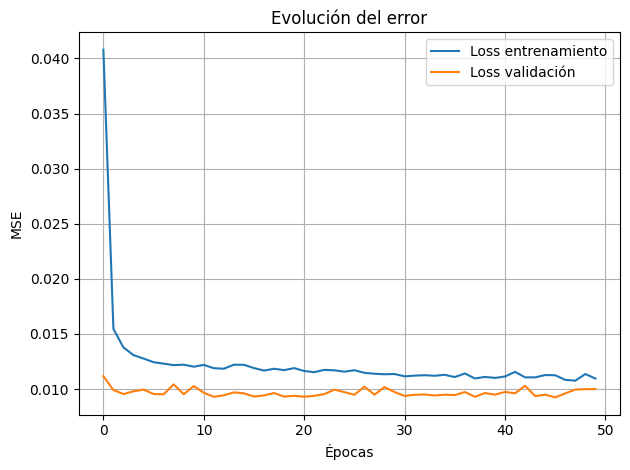

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss entrenamiento')
plt.plot(history.history['val_loss'], label='Loss validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.title('Evolución del error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusiones

10/10 [==============================] - 0s 4ms/step


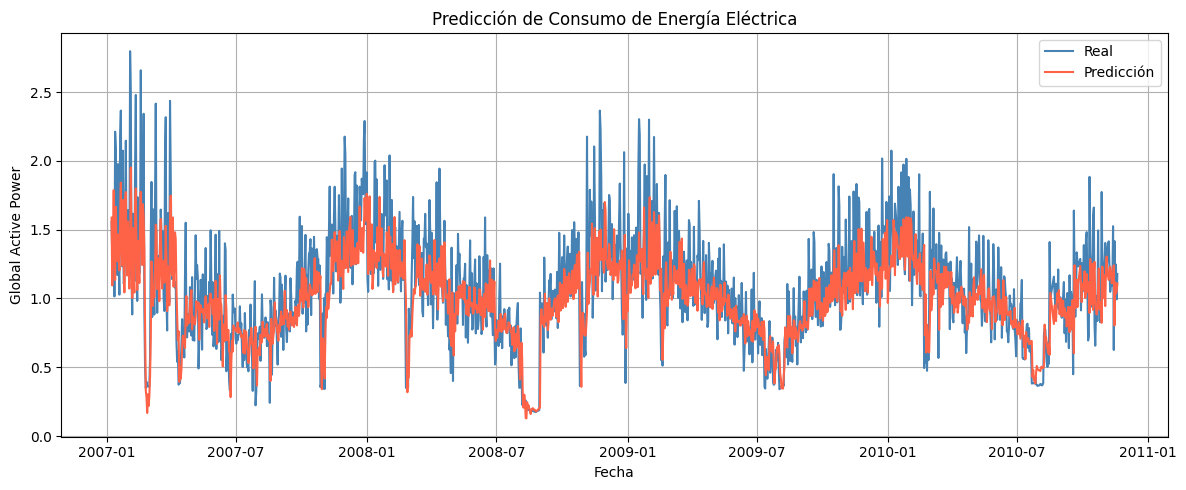

In [25]:
# Predicción sobre sets de entrenamiento y validación
train_pred = model.predict(X_train).flatten()
val_pred = model.predict(X_val).flatten()

# Invertir la escala
train_pred_inv = scaler.inverse_transform(train_pred.reshape(-1, 1)).flatten()
val_pred_inv = scaler.inverse_transform(val_pred.reshape(-1, 1)).flatten()
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Concatenar todo para visualizar en línea temporal
pred_all = np.concatenate([train_pred_inv, val_pred_inv])
real_all = np.concatenate([y_train_inv, y_val_inv])

# Crear un DataFrame con los valores reales y predichos
df_pred = pd.DataFrame({
    "fecha": df_daily["Datetime"].iloc[window_size:window_size + len(pred_all)].values,
    "real": real_all,
    "prediccion": pred_all
})

# Visualizar resultados
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_pred, x="fecha", y="real", label="Real", color="steelblue")
sns.lineplot(data=df_pred, x="fecha", y="prediccion", label="Predicción", color="tomato")
plt.title("Predicción de Consumo de Energía Eléctrica")
plt.xlabel("Fecha")
plt.ylabel("Global Active Power")
plt.grid(True)
plt.tight_layout()
plt.show()

El modelo muestra un error de validación que permanece bajo y estable, sin señales claras de sobreajuste. Esto indica que el modelo generaliza bien y que un entrenamiento más prolongado no mejora significativamente el rendimiento. En resumen, el modelo es estable y generaliza bien.